In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import os 

pd.set_option('display.max_row', 500)
pd.set_option('display.max_column', 500)

In [3]:
train_df = pd.read_csv('../data/s3e18/train.csv', 
                       index_col='id')
test_df = pd.read_csv('../data/s3e18/test.csv', 
                      index_col='id')

In [4]:
print(f'The shape of train df is {train_df.shape}')
print(f'The shape of test df is {test_df.shape}')

The shape of train df is (14838, 37)
The shape of test df is (9893, 31)


In [5]:
train_df.head(1)

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.0,11.938294,222.06808,1.181818,1.727273,2.363636,-0.24,212.163,8.17,11.922504,0.171585,4,0.0,91.536492,0.0,0.0,0.0,17.744066,0.0,4.794537,35.527357,0,0,1,1,0,0,0,0


In [6]:
test_df.head(1)

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14838,344.632371,7.283603,4.473966,5.834958,3.412257,4.65153,2.096558,1.116433,49.458581,0.0,204.079707,1.384615,1.923077,2.307692,-0.24,192.197,3.247123,10.248693,-4.734642,7,18.311899,13.512441,0.0,0.0,0.0,26.809272,24.5398,4.794537,47.304082,1,1


In [7]:
train_df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
BertzCT,14838.000000,515.153604,542.456370,0.000000,149.103601,290.987941,652.652585,4069.959780
Chi1,14838.000000,9.135189,6.819989,0.000000,4.680739,6.485270,11.170477,69.551167
Chi1n,14838.000000,5.854307,4.647064,0.000000,2.844556,4.052701,7.486791,50.174588
Chi1v,14838.000000,6.738497,5.866444,0.000000,2.932842,4.392859,8.527859,53.431954
Chi2n,14838.000000,4.432570,3.760516,0.000000,1.949719,2.970427,5.788793,32.195368
Chi2v,14838.000000,5.253221,4.925065,0.000000,2.034468,3.242775,6.609350,34.579313
Chi3v,14838.000000,3.418749,3.436208,0.000000,1.160763,1.948613,4.502070,22.880836
Chi4n,14838.000000,1.773472,1.865898,0.000000,0.503897,1.073261,2.534281,16.072810
EState_VSA1,14838.000000,29.202823,31.728679,0.000000,5.969305,17.353601,44.876559,363.705954
EState_VSA2,14838.000000,10.435316,13.651843,0.000000,0.000000,6.420822,12.841643,99.936429


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14838 entries, 0 to 14837
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BertzCT            14838 non-null  float64
 1   Chi1               14838 non-null  float64
 2   Chi1n              14838 non-null  float64
 3   Chi1v              14838 non-null  float64
 4   Chi2n              14838 non-null  float64
 5   Chi2v              14838 non-null  float64
 6   Chi3v              14838 non-null  float64
 7   Chi4n              14838 non-null  float64
 8   EState_VSA1        14838 non-null  float64
 9   EState_VSA2        14838 non-null  float64
 10  ExactMolWt         14838 non-null  float64
 11  FpDensityMorgan1   14838 non-null  float64
 12  FpDensityMorgan2   14838 non-null  float64
 13  FpDensityMorgan3   14838 non-null  float64
 14  HallKierAlpha      14838 non-null  float64
 15  HeavyAtomMolWt     14838 non-null  float64
 16  Kappa3             148

In [9]:
targets = train_df.columns[train_df.columns.str.startswith('EC')].tolist()
targets

['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']

In [10]:
features = [col for col in train_df.columns if col not in targets]
len(features)

31

<AxesSubplot:>

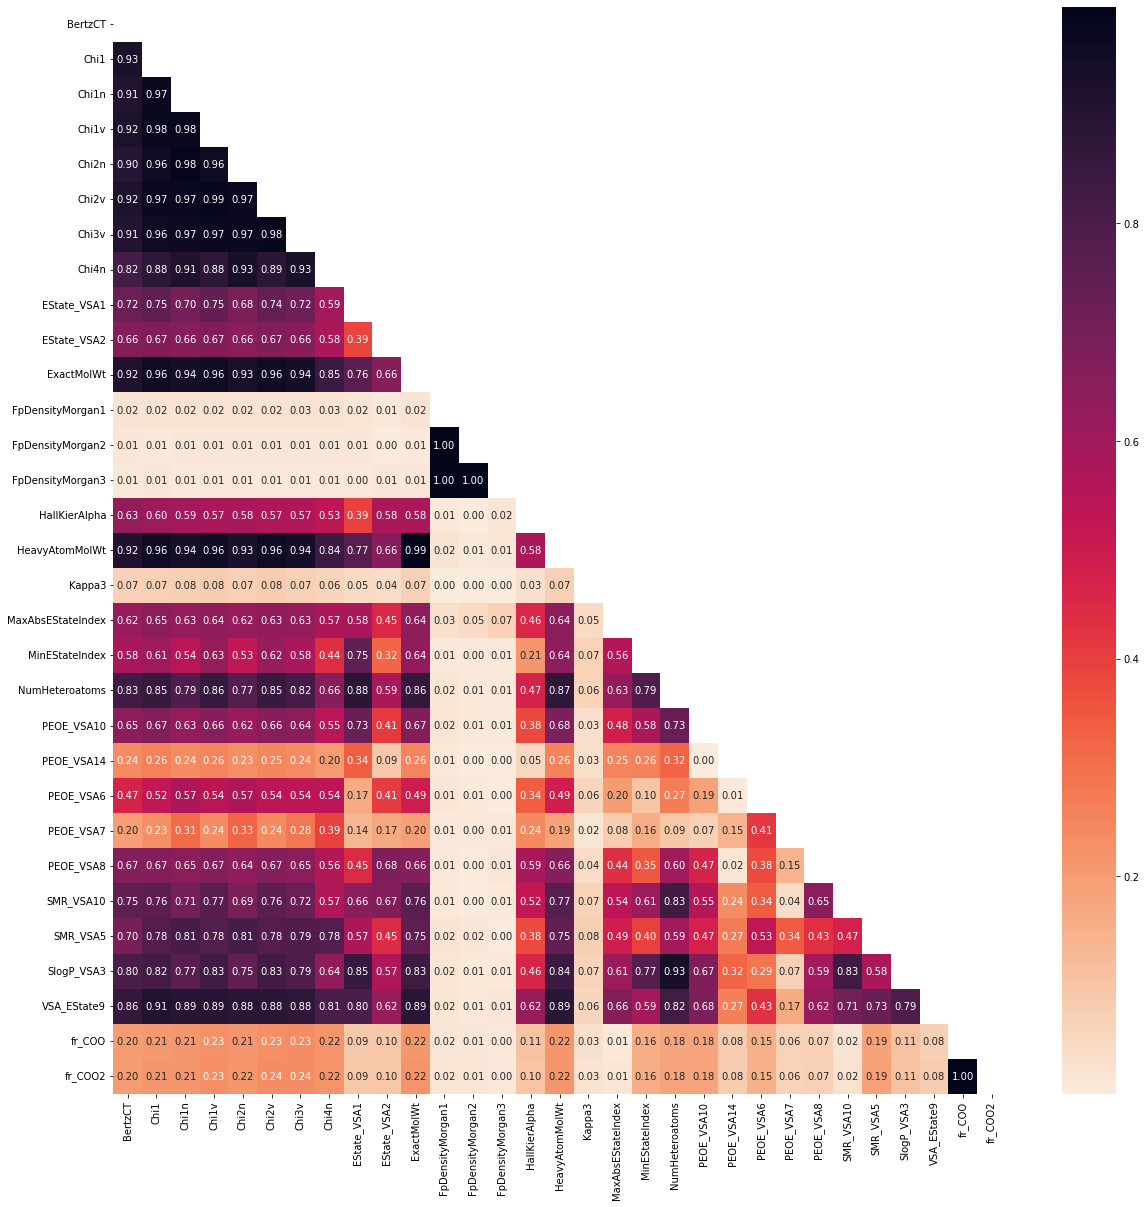

In [18]:
plt.figure(figsize=(20, 20))
corr = abs(train_df[features].corr())
mask = np.triu(np.ones_like(corr))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2f', cmap='rocket_r')

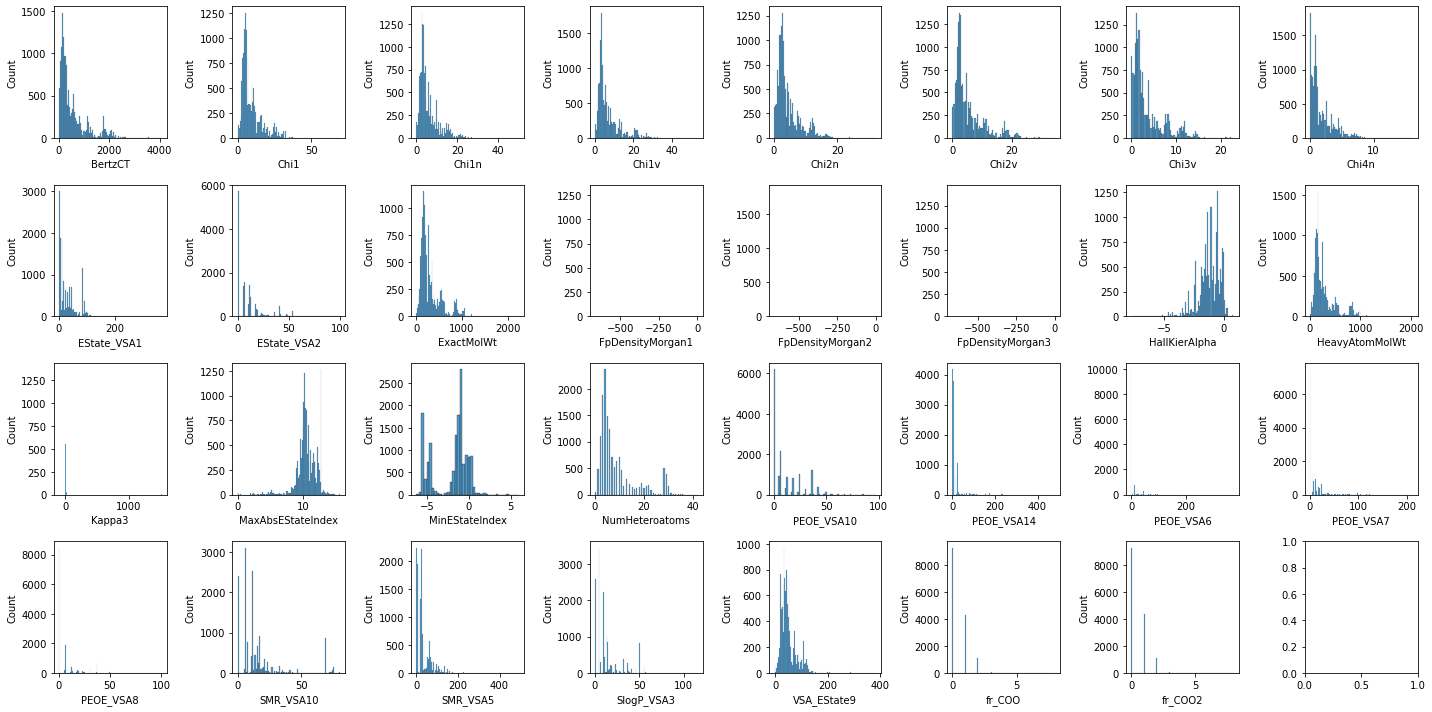

In [19]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(data=train_df, x=col, ax=axes[i])

plt.tight_layout()
plt.show()

In [20]:
for col in features:
    print(f'The number of unique values in {col} is {train_df[col].nunique()}')
    print('---------------')

The number of unique values in BertzCT is 2368
---------------
The number of unique values in Chi1 is 1259
---------------
The number of unique values in Chi1n is 3157
---------------
The number of unique values in Chi1v is 3306
---------------
The number of unique values in Chi2n is 3634
---------------
The number of unique values in Chi2v is 3725
---------------
The number of unique values in Chi3v is 3448
---------------
The number of unique values in Chi4n is 2930
---------------
The number of unique values in EState_VSA1 is 719
---------------
The number of unique values in EState_VSA2 is 445
---------------
The number of unique values in ExactMolWt is 1666
---------------
The number of unique values in FpDensityMorgan1 is 556
---------------
The number of unique values in FpDensityMorgan2 is 650
---------------
The number of unique values in FpDensityMorgan3 is 654
---------------
The number of unique values in HallKierAlpha is 388
---------------
The number of unique values in H

In [26]:
def calculate_probability(df, feature, target):
    df = df.groupby(feature).agg({target: 'mean'})
    df = df.reset_index()
    return df

df = calculate_probability(train_df, 'FpDensityMorgan2', 'EC1')
df.head()

,FpDensityMorgan2,EC1
0,-666.000000,1.0
1,-14.458462,1.0
2,-5.111111,0.0
3,0.000000,1.0
4,0.350000,1.0


In [38]:
prob = [train_df[col].mean() for col in targets]
targets_prob = dict(zip(targets, prob))
targets_prob['EC1']

0.6677449791076965

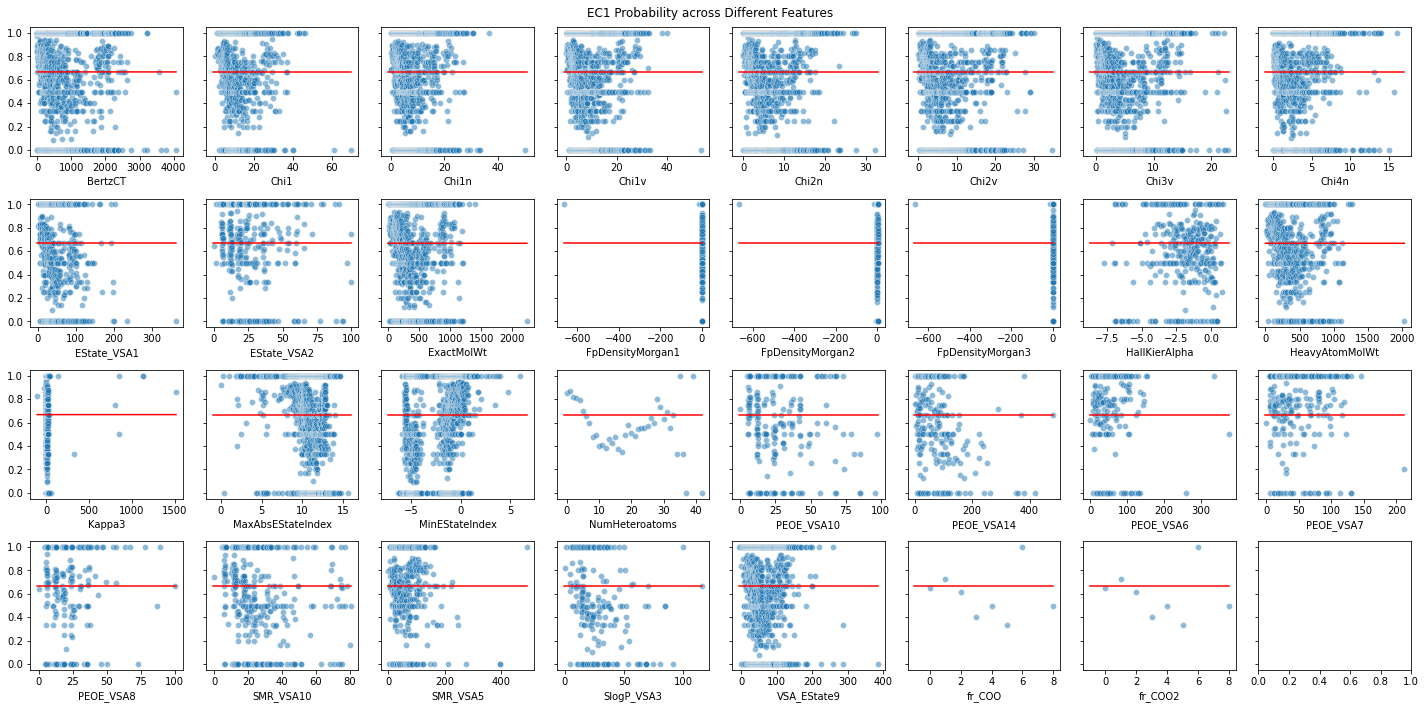

In [51]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10), sharey=True)
axes = axes.flatten()

target = 'EC1'
for i, col in enumerate(features):
    df = calculate_probability(train_df, col, target)
    sns.scatterplot(data=df, x=col, y=target, 
                    alpha=0.5, ax=axes[i])
    sns.lineplot(x=np.arange(df[col].min()-1, 
                             df[col].max()+1, 1), 
                             y=targets_prob[target], 
                             color='r', ax=axes[i])
    axes[i].set_ylabel('')

plt.suptitle(f'{target} Probability across Different Features')
plt.tight_layout()
plt.show()

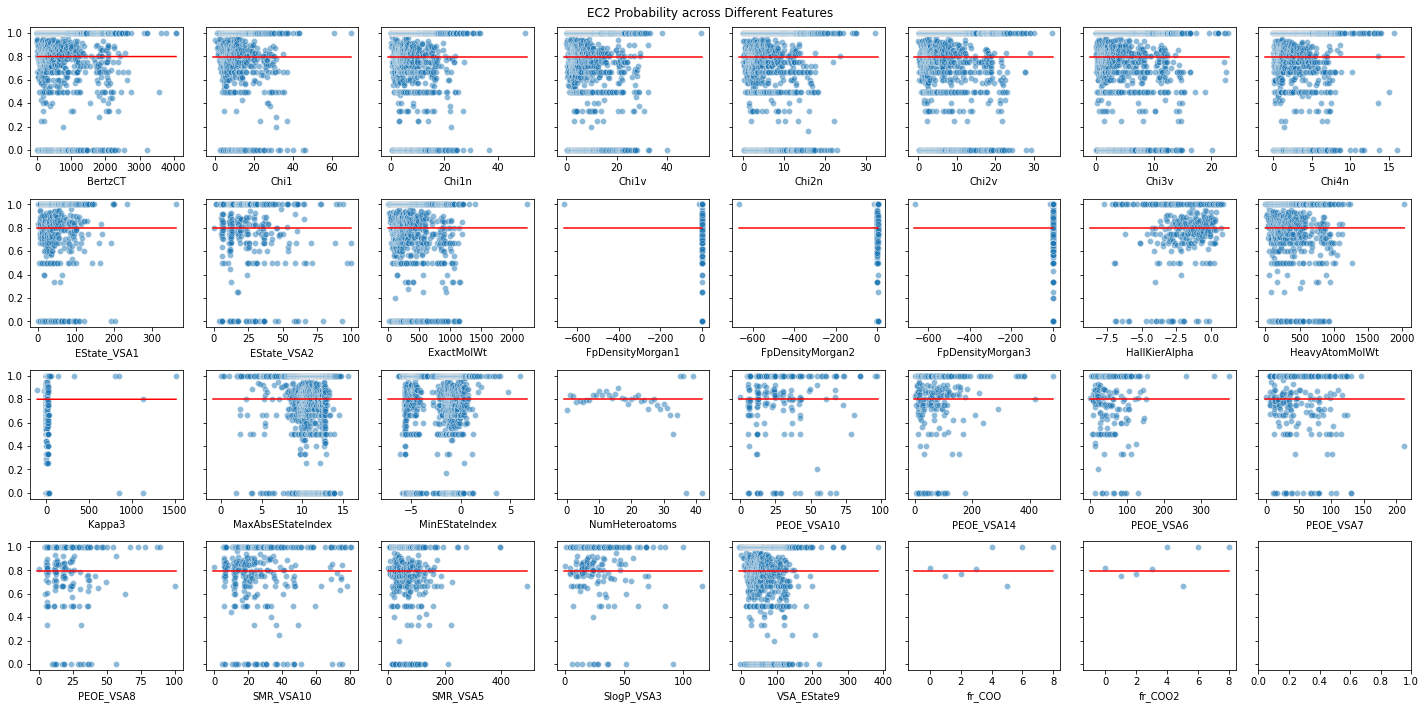

In [52]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10), sharey=True)
axes = axes.flatten()

target = 'EC2'
for i, col in enumerate(features):
    df = calculate_probability(train_df, col, target)
    sns.scatterplot(data=df, x=col, y=target, 
                    alpha=0.5, ax=axes[i])
    sns.lineplot(x=np.arange(df[col].min()-1, 
                             df[col].max()+1, 1), 
                             y=targets_prob[target], 
                             color='r', ax=axes[i])
    axes[i].set_ylabel('')

plt.suptitle(f'{target} Probability across Different Features')
plt.tight_layout()
plt.show()

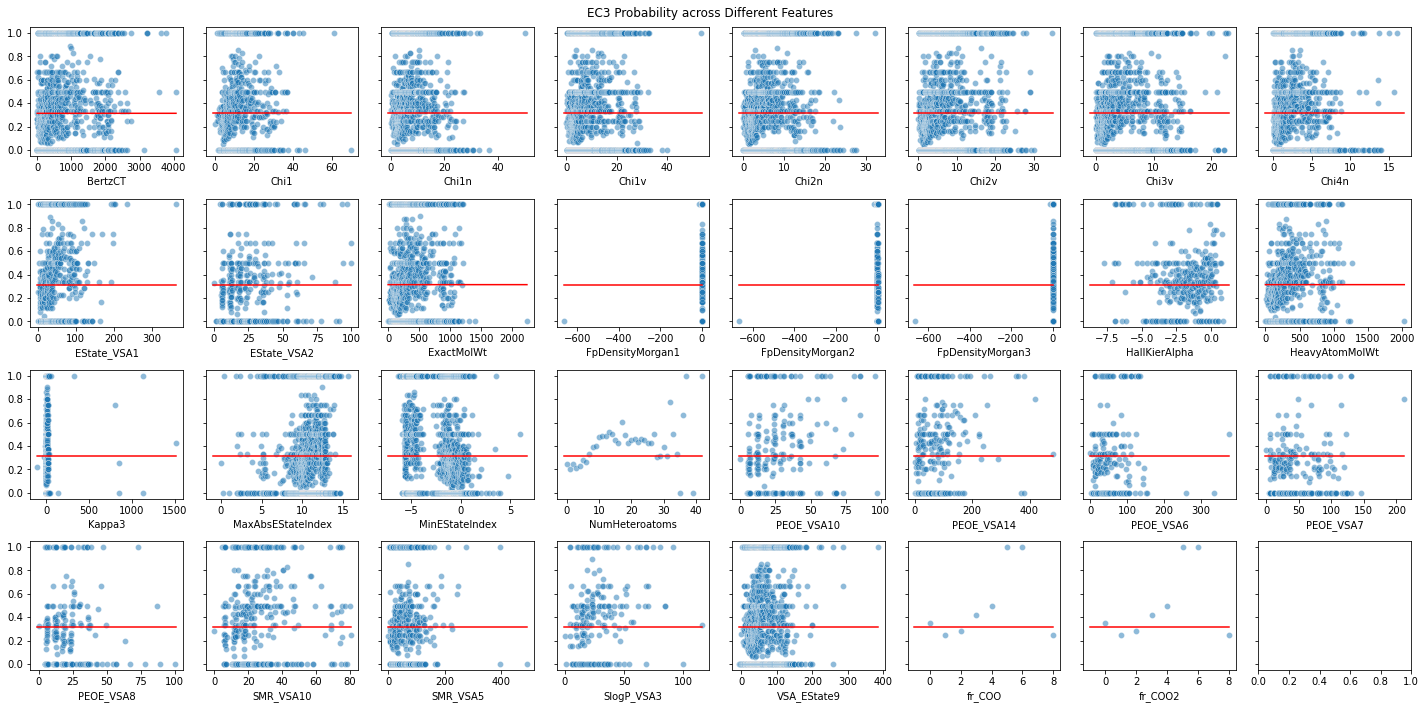

In [53]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10), sharey=True)
axes = axes.flatten()

target = 'EC3'
for i, col in enumerate(features):
    df = calculate_probability(train_df, col, target)
    sns.scatterplot(data=df, x=col, y=target, 
                    alpha=0.5, ax=axes[i])
    sns.lineplot(x=np.arange(df[col].min()-1, 
                             df[col].max()+1, 1), 
                             y=targets_prob[target], 
                             color='r', ax=axes[i])
    axes[i].set_ylabel('')

plt.suptitle(f'{target} Probability across Different Features')
plt.tight_layout()
plt.show()

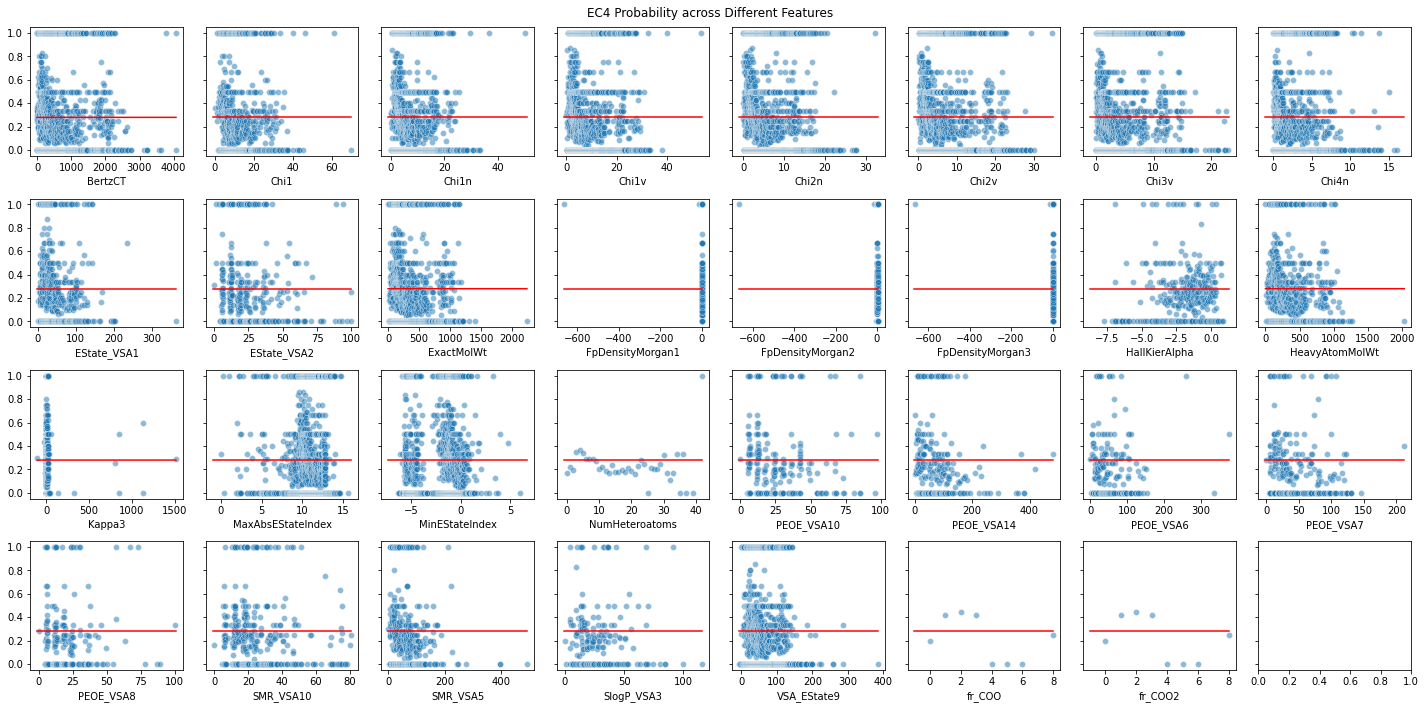

In [54]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10), sharey=True)
axes = axes.flatten()

target = 'EC4'
for i, col in enumerate(features):
    df = calculate_probability(train_df, col, target)
    sns.scatterplot(data=df, x=col, y=target, 
                    alpha=0.5, ax=axes[i])
    sns.lineplot(x=np.arange(df[col].min()-1, 
                             df[col].max()+1, 1), 
                             y=targets_prob[target], 
                             color='r', ax=axes[i])
    axes[i].set_ylabel('')

plt.suptitle(f'{target} Probability across Different Features')
plt.tight_layout()
plt.show()

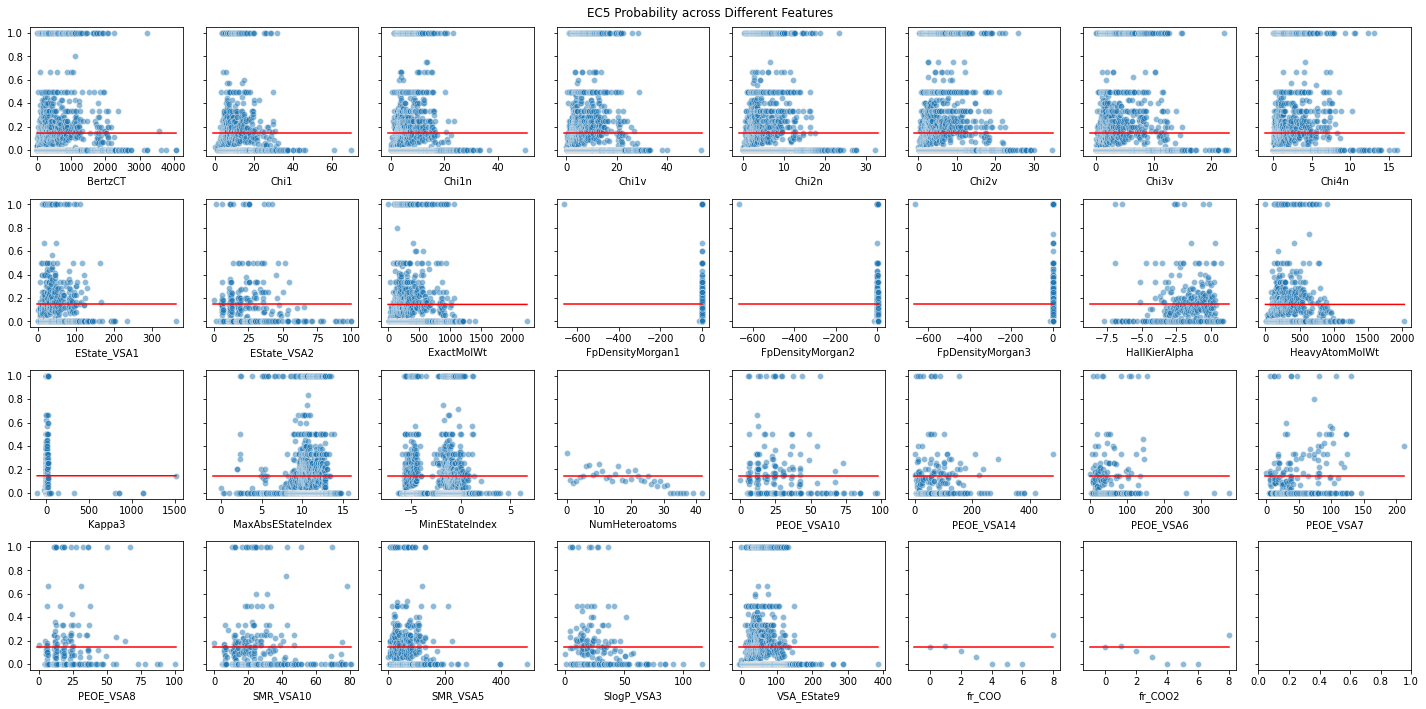

In [55]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10), sharey=True)
axes = axes.flatten()

target = 'EC5'
for i, col in enumerate(features):
    df = calculate_probability(train_df, col, target)
    sns.scatterplot(data=df, x=col, y=target, 
                    alpha=0.5, ax=axes[i])
    sns.lineplot(x=np.arange(df[col].min()-1, 
                             df[col].max()+1, 1), 
                             y=targets_prob[target], 
                             color='r', ax=axes[i])
    axes[i].set_ylabel('')

plt.suptitle(f'{target} Probability across Different Features')
plt.tight_layout()
plt.show()

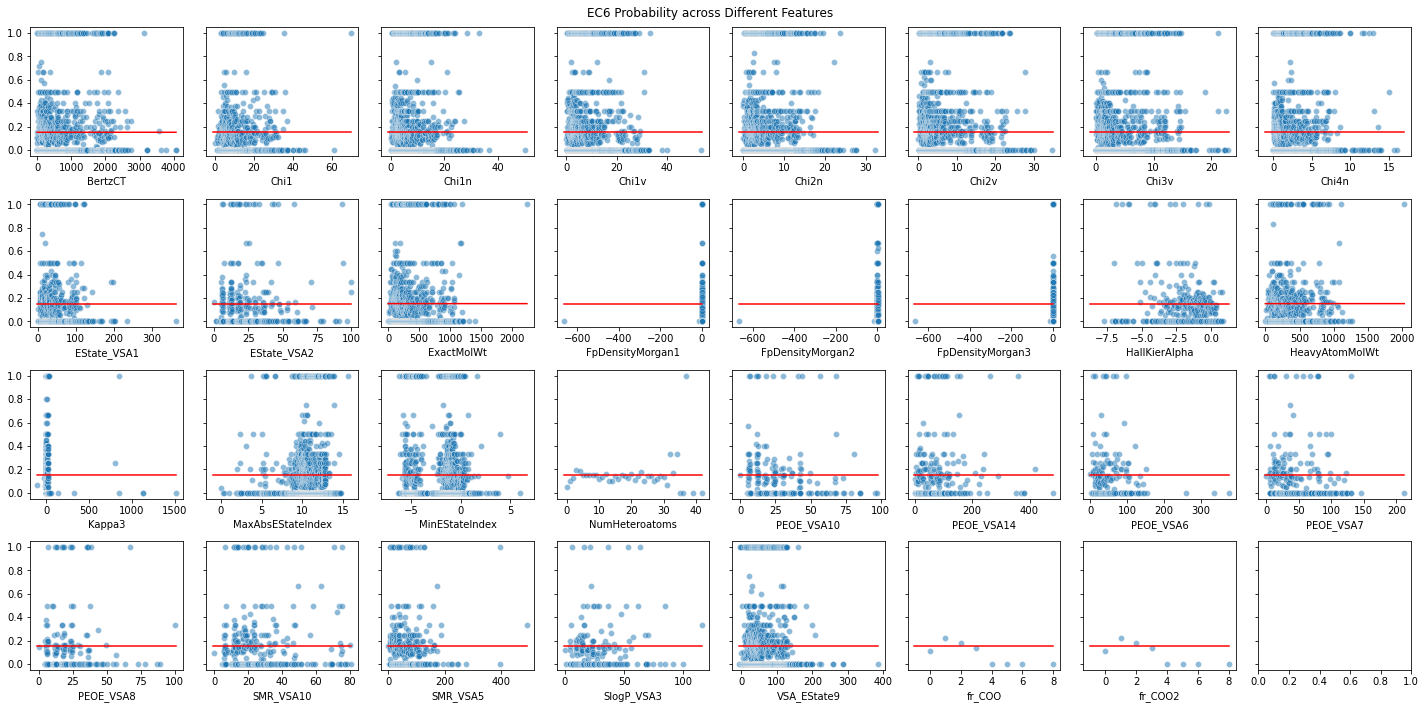

In [56]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10), sharey=True)
axes = axes.flatten()

target = 'EC6'
for i, col in enumerate(features):
    df = calculate_probability(train_df, col, target)
    sns.scatterplot(data=df, x=col, y=target, 
                    alpha=0.5, ax=axes[i])
    sns.lineplot(x=np.arange(df[col].min()-1, 
                             df[col].max()+1, 1), 
                             y=targets_prob[target], 
                             color='r', ax=axes[i])
    axes[i].set_ylabel('')

plt.suptitle(f'{target} Probability across Different Features')
plt.tight_layout()
plt.show()

In [61]:
train_df['EC_all'] = train_df[targets].sum(axis=1)
train_df['EC_all'].value_counts()

2    10392
3     3682
4      616
5      119
1       21
6        8
Name: EC_all, dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

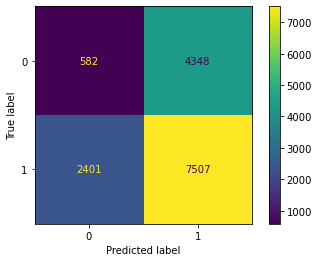

In [64]:
cm = confusion_matrix(train_df['EC1'], train_df['EC2'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [65]:
train_df['EC1+EC2'] = train_df['EC1'] + train_df['EC2']

In [69]:
train_df['EC1+EC2'].mean()

1.4667071033832053

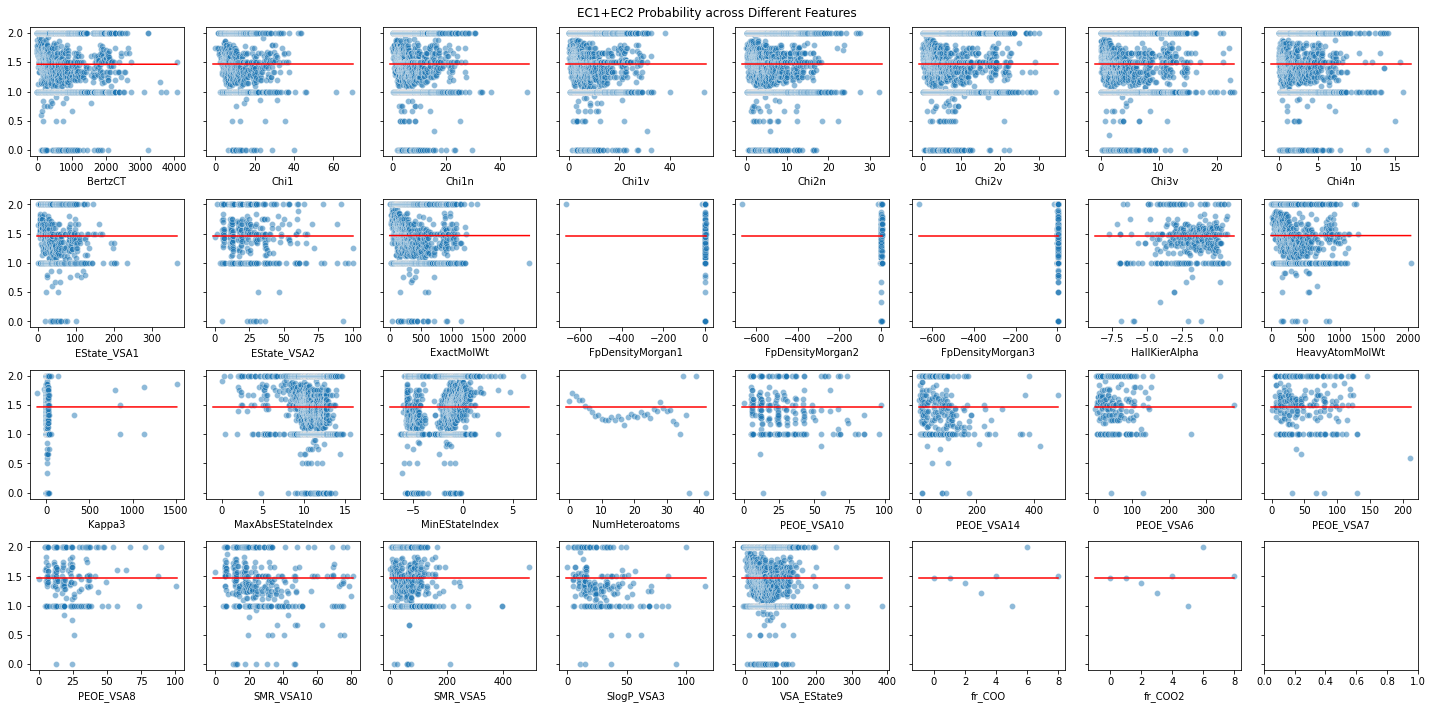

In [70]:
fig, axes = plt.subplots(4, 8, figsize=(20, 10), sharey=True)
axes = axes.flatten()

target = 'EC1+EC2'
for i, col in enumerate(features):
    df = calculate_probability(train_df, col, target)
    sns.scatterplot(data=df, x=col, y=target, 
                    alpha=0.5, ax=axes[i])
    sns.lineplot(x=np.arange(df[col].min()-1, 
                             df[col].max()+1, 1), 
                             y=1.4667071033832053, 
                             color='r', ax=axes[i])
    axes[i].set_ylabel('')

plt.suptitle(f'{target} Probability across Different Features')
plt.tight_layout()
plt.show()

In [84]:
train_df['EC12'] = 0
idx_1 = train_df[(train_df['EC1']==0) & (train_df['EC2']==1)].index
idx_2 = train_df[(train_df['EC1']==1) & (train_df['EC2']==0)].index
idx_3 = train_df[(train_df['EC1']==1) & (train_df['EC2']==1)].index

train_df.iloc[idx_1, -1:] = 1
train_df.iloc[idx_2, -1:] = 2
train_df.iloc[idx_3, -1:] = 3

In [87]:
train_df[train_df['EC12']==0]

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6,EC_all,EC1+EC2,EC12
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73,26.264663,2.642734,1.689533,1.689533,1.643725,1.643725,0.000000,0.000000,12.514062,0.000000,90.031694,1.800000,2.000000,2.400000,-0.04,84.030,3.430000,9.636574,-1.833333,3,0.000000,5.969305,0.000000,0.000000,0.000000,5.969305,6.923737,4.794537,21.666667,1,1,0,0,1,0,0,1,2,0,0
151,240.153709,6.011637,3.713500,5.243426,2.847010,4.324150,2.224311,0.835261,45.452327,0.000000,262.045369,1.000000,1.666667,2.333333,-0.09,247.031,5.848400,10.245792,-4.784798,10,0.000000,7.822697,0.000000,0.000000,0.000000,7.822697,24.415866,9.088795,54.415699,0,0,0,0,1,1,0,0,2,0,0
152,159.685908,4.036581,2.189533,2.189533,1.631056,1.631056,0.476054,0.182919,24.601926,0.000000,178.047738,1.600000,2.400000,2.600000,-2.10,168.060,1.972801,10.090871,-1.416714,5,6.041841,11.938611,0.000000,12.841643,0.000000,11.938611,12.841643,9.589074,29.333333,2,2,0,0,0,0,1,1,2,0,0
156,146.218849,5.574586,3.562009,3.562009,2.719449,2.719449,1.867059,1.081734,12.011146,0.000000,180.063388,1.166667,1.916667,2.416667,-0.24,168.060,1.581759,9.119537,-1.568935,6,24.415866,0.000000,0.000000,0.000000,0.000000,0.000000,30.705892,4.794537,41.666667,1,1,0,0,1,1,1,0,3,0,0
167,540.190796,10.508726,6.112060,7.848913,4.677621,5.910009,3.679483,2.160881,38.969379,6.420822,331.068170,1.142857,1.785714,2.500000,-2.11,317.113,2.973905,12.285313,-1.199373,9,12.145807,5.969305,0.000000,24.117007,23.762553,16.872230,12.145807,11.215359,23.655008,1,1,0,0,0,0,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,453.304958,9.949161,5.659530,5.659530,4.058933,4.058933,3.710734,2.083590,37.312774,0.000000,272.068473,1.125000,1.687500,2.125000,-0.09,248.196,1.929519,9.817836,-1.456687,6,24.415866,0.000000,0.000000,0.000000,0.000000,0.000000,30.705892,4.736863,47.833333,0,0,0,0,1,0,1,0,2,0,0
14731,83.108030,3.680739,2.281282,2.281282,1.949719,1.949719,0.935933,0.386571,12.011146,6.420822,97.976895,1.600000,2.000000,2.200000,-0.73,96.063,3.430000,10.245792,-0.933313,3,0.000000,5.969305,0.000000,0.000000,0.000000,5.969305,6.923737,4.794537,24.000000,1,1,0,0,0,1,0,1,2,0,0
14738,635.074655,13.666810,8.561328,10.562698,6.094210,8.172950,5.642791,2.656467,29.843583,6.420822,457.170981,0.934426,1.684211,2.282051,-1.63,434.263,4.589615,12.642113,-1.975306,14,42.665639,11.938611,0.000000,37.107112,12.263211,47.325300,56.065463,23.972686,86.116129,2,2,0,0,1,1,0,0,2,0,0


In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [106]:
float_cols = [col for col in train_df.columns if train_df[col].dtype=='float64']
int_cols = ['NumHeteroatoms', 'fr_COO', 'fr_COO2']
float_cols

['BertzCT',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3v',
 'Chi4n',
 'EState_VSA1',
 'EState_VSA2',
 'ExactMolWt',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'HallKierAlpha',
 'HeavyAtomMolWt',
 'Kappa3',
 'MaxAbsEStateIndex',
 'MinEStateIndex',
 'PEOE_VSA10',
 'PEOE_VSA14',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'SMR_VSA10',
 'SMR_VSA5',
 'SlogP_VSA3',
 'VSA_EState9']

In [111]:
for col in int_cols:
    print(sorted(train_df[col].unique()))
    print('----------------')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 42]
----------------
[0, 1, 2, 3, 4, 5, 6, 8]
----------------
[0, 1, 2, 3, 4, 5, 6, 8]
----------------


In [113]:
sc = StandardScaler()

train_df[features] = sc.fit_transform(train_df[features])
train_df.head()


,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6,EC_all,EC1+EC2,EC12
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.353520,0.109202,0.004577,-0.147099,-0.033989,-0.192585,-0.193312,-0.013007,-0.920423,0.110097,-0.313054,-0.010008,-0.015431,0.019663,1.034742,-0.295231,0.050201,0.876085,1.108894,-0.599739,-0.789601,2.133838,-0.453655,-0.561197,-0.617069,0.114897,-0.916535,-0.605725,-0.472430,-0.686028,-0.687373,1,1,0,0,0,0,2,2,3
1,-0.445083,-0.275105,-0.304039,-0.154023,-0.305161,-0.155939,-0.354290,-0.259239,0.502170,-0.764415,-0.144617,0.019920,0.048196,0.093394,1.195122,-0.131279,-0.058451,0.241070,-1.311822,0.185241,0.959575,-0.288402,-0.453655,-0.561197,-0.617069,-0.433863,-0.010637,0.012928,-0.157766,-0.686028,-0.687373,0,1,1,0,0,0,2,1,1
2,0.011965,0.260436,0.575340,0.735115,0.593747,0.866309,0.700235,-0.001551,-0.427307,-0.280443,0.397148,-0.027510,-0.012595,0.026273,0.457377,0.372197,0.200301,0.437129,-1.425939,0.054411,-0.789601,-0.062054,-0.453655,2.085343,-0.617069,-0.001182,1.241380,0.296446,-0.125107,-0.686028,-0.687373,1,1,0,0,1,0,3,2,3
3,0.096375,0.486550,0.265728,1.039031,0.543947,1.162446,1.308403,0.693367,2.093972,-0.764415,1.053558,-0.013473,-0.043364,0.002690,-0.098605,1.086999,0.018586,0.394238,-1.527723,1.362710,2.271458,0.102577,-0.453655,-0.561197,-0.026108,-0.001182,0.915782,1.255304,1.309393,-0.686028,-0.687373,1,1,0,0,0,0,2,2,3
4,-0.741804,-0.692175,-0.643024,-0.660092,-0.679966,-0.685819,-0.693316,-0.560504,-0.353710,0.176270,-0.774526,0.037820,0.054417,0.054551,0.115234,-0.784751,-0.042492,-0.449376,0.214619,-0.599739,-0.356758,-0.169309,-0.103194,0.399998,-0.617069,-0.206208,-0.359426,-0.277288,-0.547635,2.308318,2.306241,1,0,1,1,1,0,4,1,2


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [117]:
X, y = train_df[features].values, train_df['EC12'].values

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Mean accuracy of Logistic Regression: {np.mean(scores):.4f}')

Mean accuracy of Logistic Regression: 0.5459


In [118]:
from xgboost import XGBClassifier

In [122]:
X, y = train_df[features].values, train_df['EC12'].values

model = XGBClassifier(objective='multi:softmax')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Mean accuracy of xgboost: {np.mean(scores):.4f}')

Mean accuracy of xgboost: 0.5358


In [120]:
from lightgbm import LGBMClassifier

In [121]:
X, y = train_df[features].values, train_df['EC12'].values

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Mean accuracy of lightGBM: {np.mean(scores):.4f}')

Mean accuracy of lightGBM: 0.5471


In [123]:
from catboost import CatBoostClassifier

In [125]:
train_df['EC12'].value_counts()/train_df.shape[0]

3    0.505931
1    0.293031
2    0.161814
0    0.039224
Name: EC12, dtype: float64

In [127]:
from sklearn.model_selection import StratifiedKFold

In [128]:
skf = StratifiedKFold(n_splits=5)

scores = []
for i, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_val, y_val = X[val_idx], y[val_idx]


Fold 1:
Train index = [ 2817  2822  2832 ... 14835 14836 14837]
Validation index = [   0    1    2 ... 3105 3164 3179]
Fold 2:
Train index = [    0     1     2 ... 14835 14836 14837]
Validation index = [2817 2822 2832 ... 5990 5991 5993]
Fold 3:
Train index = [    0     1     2 ... 14835 14836 14837]
Validation index = [5728 5731 5737 ... 8954 8956 8957]
Fold 4:
Train index = [    0     1     2 ... 14835 14836 14837]
Validation index = [ 8741  8792  8813 ... 11989 11996 12001]
Fold 5:
Train index = [    0     1     2 ... 11989 11996 12001]
Validation index = [11834 11838 11839 ... 14835 14836 14837]
